In [ ]:
!pip install pandas openpyxl BeautifulSoup
import pandas as pd
import csv
from bs4 import BeautifulSoup


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## 에브리타임 강의평가 강의실 탭을 검색하여 수작업으로 추출 (서울대)
예시 : https://everytime.kr/lecture/view/2180216?tab=article (기계공학개론)
접속 후 F12를 눌러서 chrome 기준 ctrl+shift+c 키를 눌러서 웹페이지의 요소를 갖고 html 태그를 확인해서
articles 부분이 선택되도록 한다. 그리고 선택이 되었으면 copy element를 눌러서 복사해온다.
그리고 복사한 것을 아래 html = """ (여기에 넣어준다) """

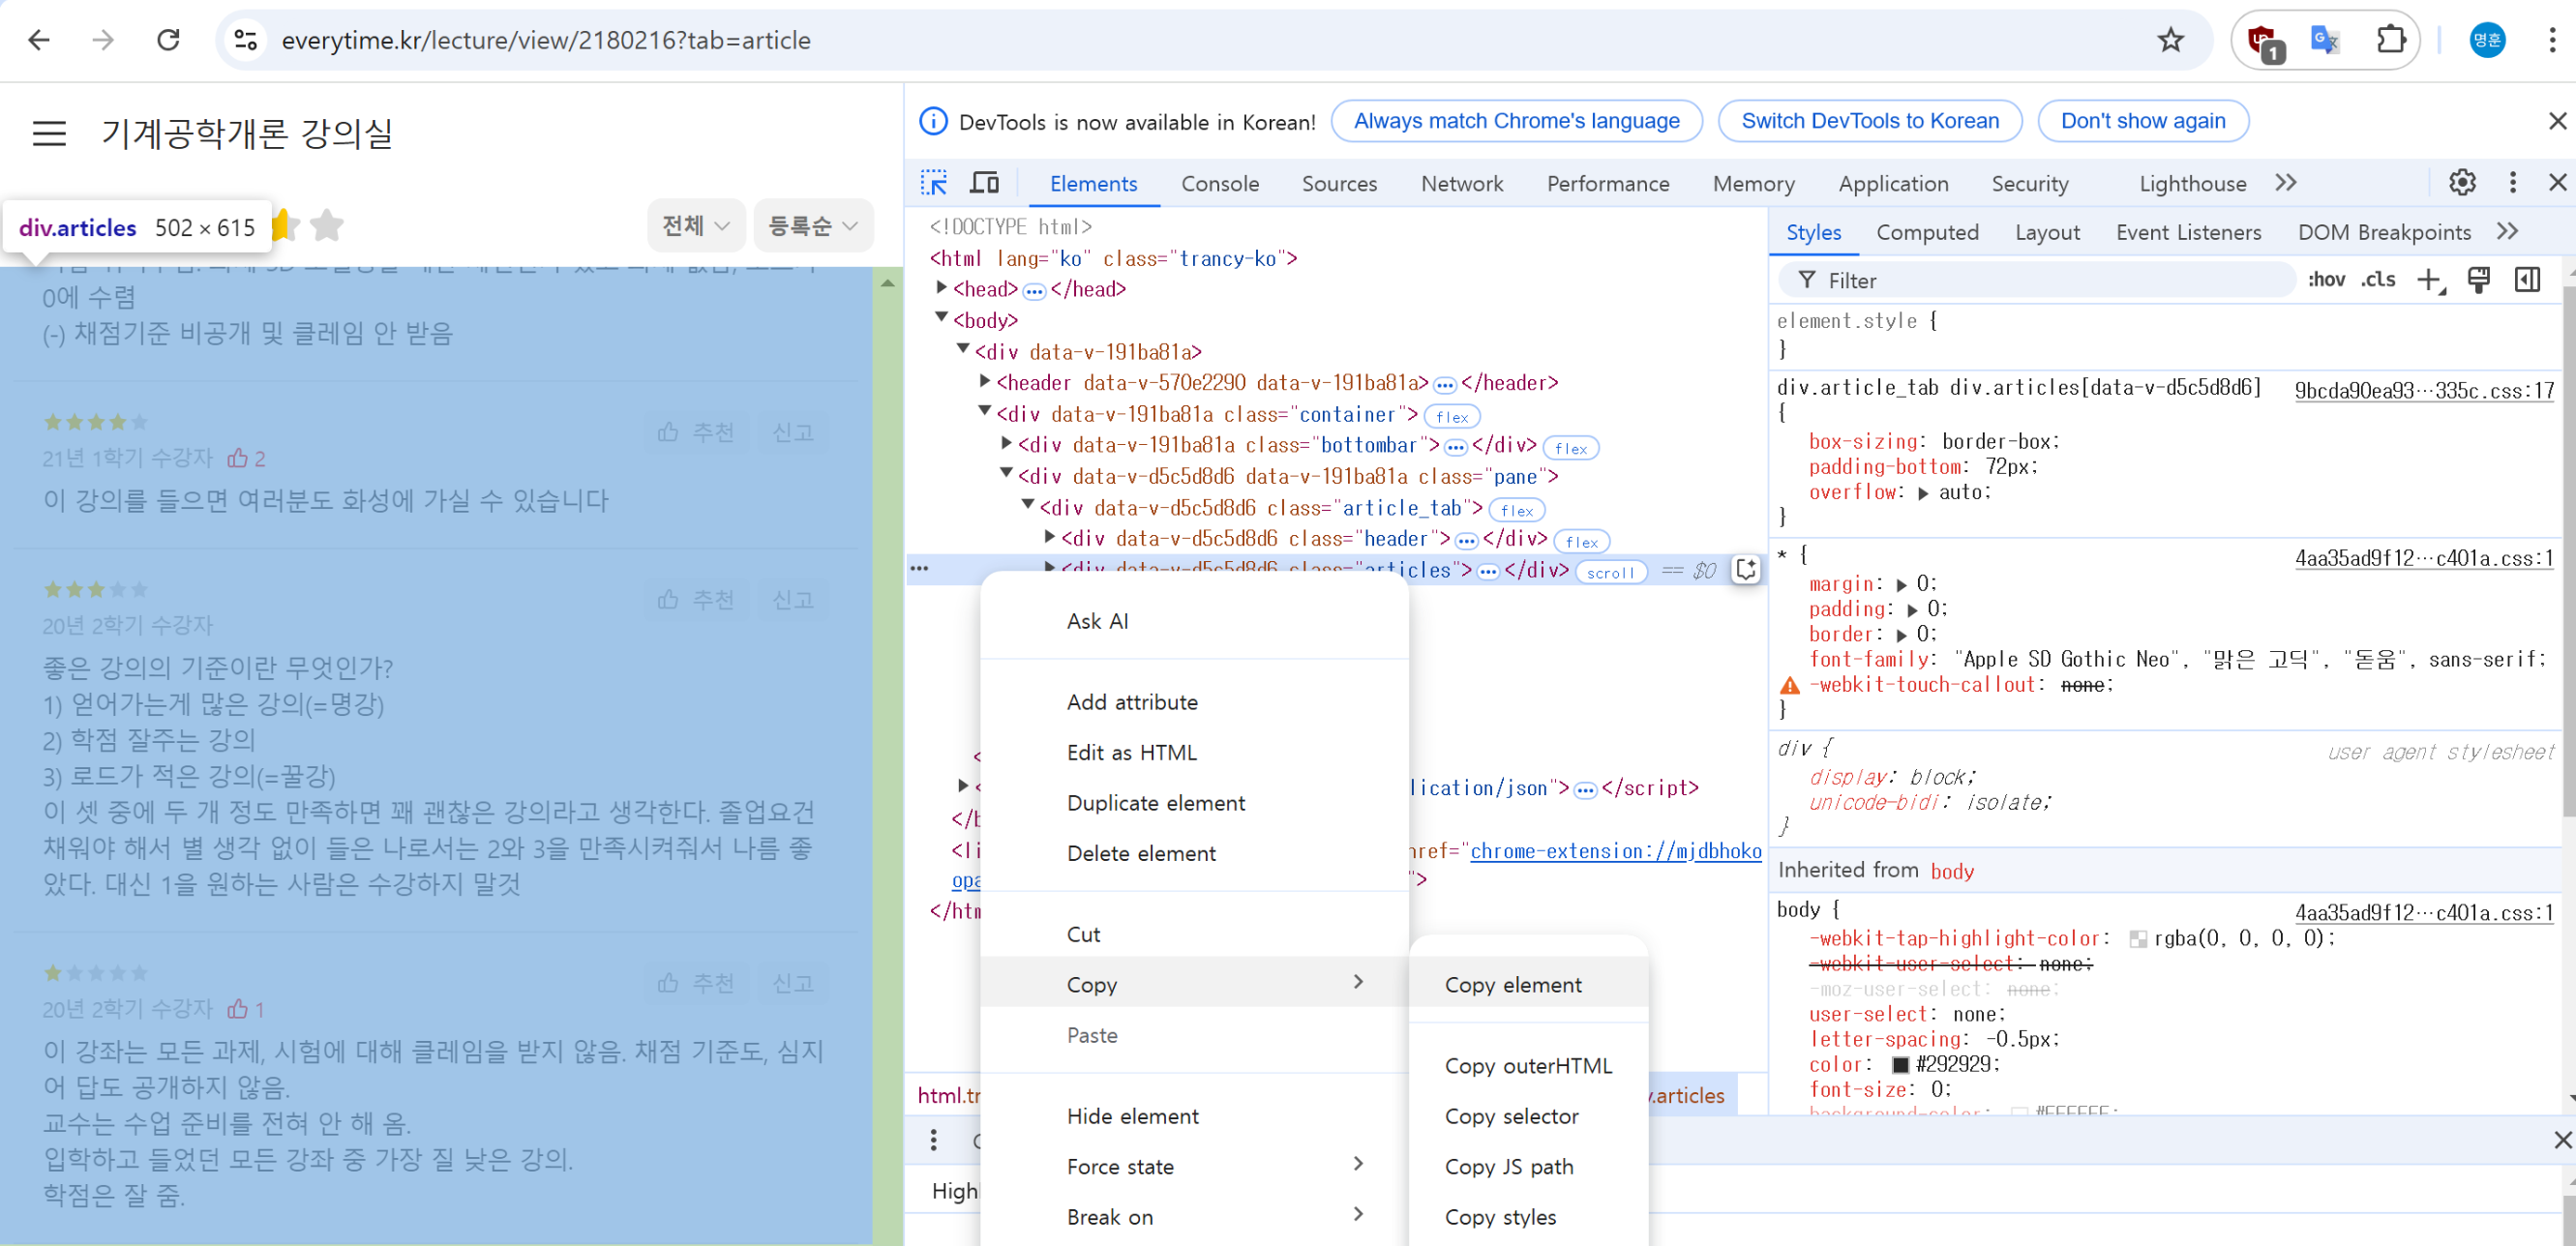

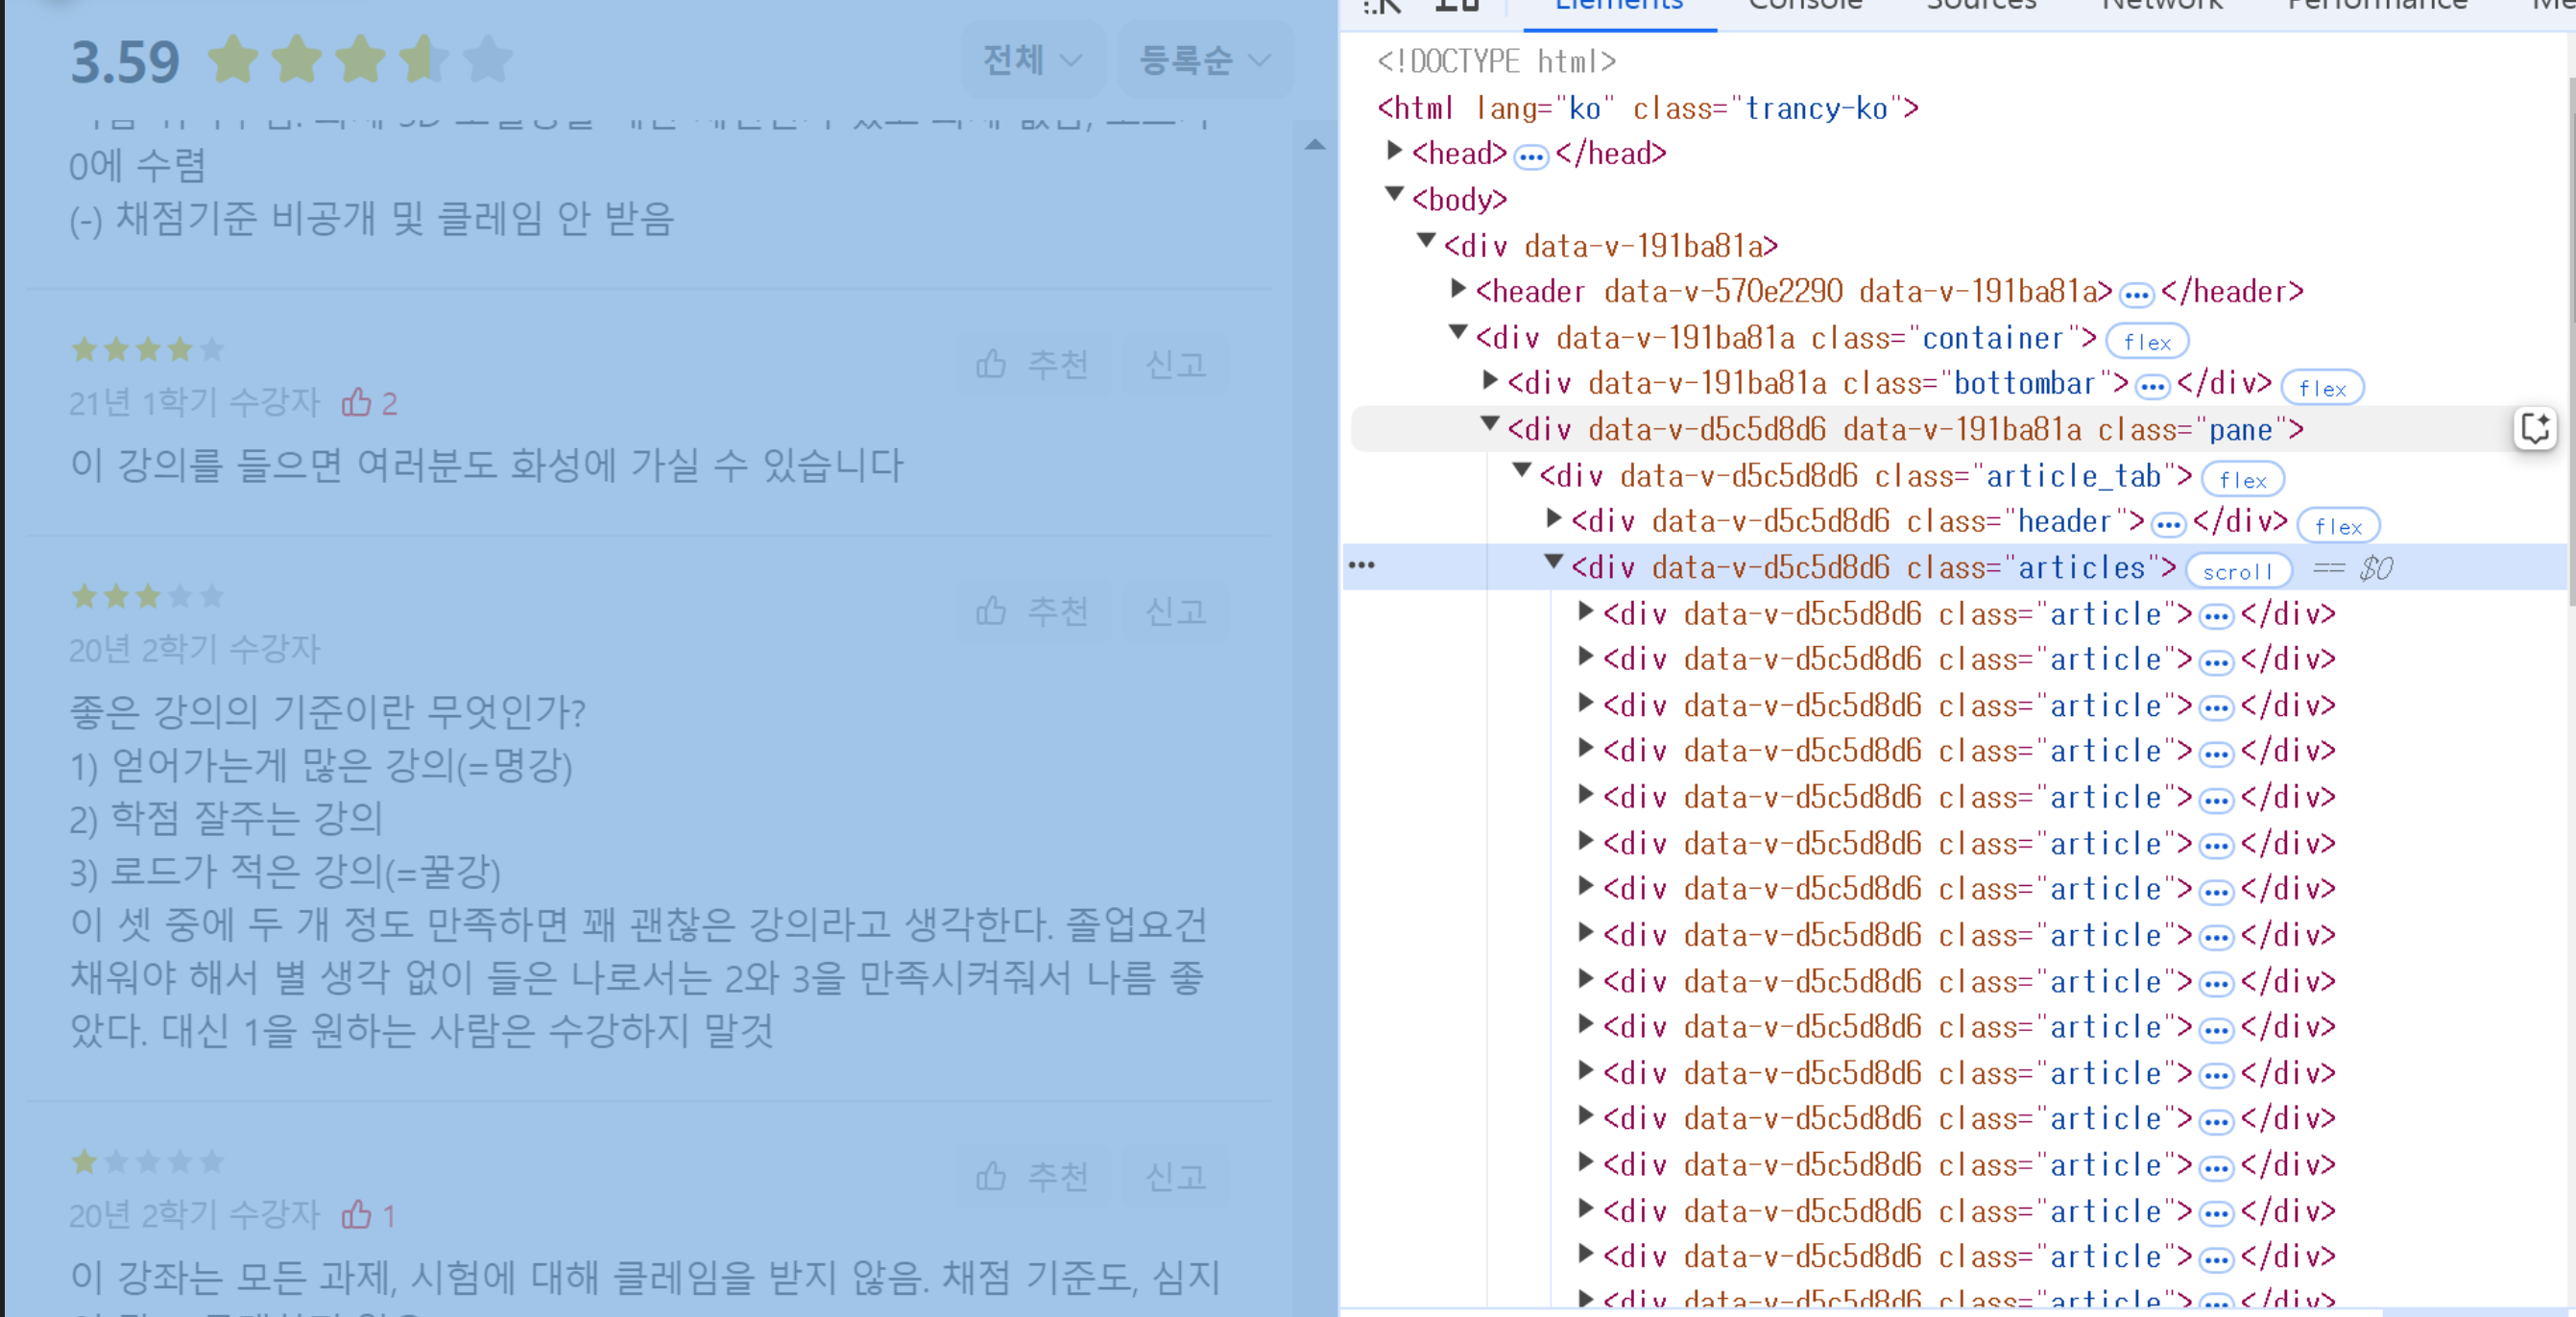

In [ ]:
# 강의 이름 입력(예시) - 나중에 저장될 파일 이름으로 사용됩니다. 강의 이름이 다를 경우 다른 파일로 구분됩니다.
subject_name = "블록체인의 실무응용 1"

# 교수 이름 입력(예시) - 나중에 사용됩니다. 만약에 강의 이름이 같은데 교수 이름이 다를 경우 같은 파일에서 아랫 부분에 교수 이름으로 구분되어 한 파일로 저장됩니다.
professor_name = "강현구"

# 복사한 articles element를 여기에 붙여넣는다.
# html = """
# (복사한 element들)
# """

# 예시
html = """
<div data-v-d5c5d8d6="" class="articles"><div data-v-d5c5d8d6="" class="article"><div data-v-d5c5d8d6="" class="article_header"><div data-v-d5c5d8d6="" class="title"><div data-v-d5c5d8d6="" class="rate"><span data-v-d5c5d8d6="" class="star"><span data-v-d5c5d8d6="" class="on" style="width: 40%;"></span></span></div> <div data-v-d5c5d8d6="" class="info"><span data-v-d5c5d8d6="" class="semester">
                  21년 2학기 수강자
                </span> <span data-v-d5c5d8d6="" class="posvote">
                  2
                </span></div></div> <div data-v-d5c5d8d6="" class="buttons"><button data-v-d5c5d8d6="" class="posvote">
                추천
              </button> <button data-v-d5c5d8d6="">
                신고
              </button></div></div> <div data-v-d5c5d8d6="" class="text">꿀이라면 꿀이긴 한데
얻어가는건 없었습니다
블록체인이 뭔지 알고싶은 입문자면 다른 강의 들으세요</div></div><div data-v-d5c5d8d6="" class="article"><div data-v-d5c5d8d6="" class="article_header"><div data-v-d5c5d8d6="" class="title"><div data-v-d5c5d8d6="" class="rate"><span data-v-d5c5d8d6="" class="star"><span data-v-d5c5d8d6="" class="on" style="width: 100%;"></span></span></div> <div data-v-d5c5d8d6="" class="info"><span data-v-d5c5d8d6="" class="semester">
                  20년 1학기 수강자
                </span> <span data-v-d5c5d8d6="" class="posvote">
                  1
                </span></div></div> <div data-v-d5c5d8d6="" class="buttons"><button data-v-d5c5d8d6="" class="posvote">
                추천
              </button> <button data-v-d5c5d8d6="">
                신고
              </button></div></div> <div data-v-d5c5d8d6="" class="text">최고의 수업입니다! 블록체인에서 유명하신 분들도 오셔서 강연하시고, 블록체인이 무엇인지 배울 수 있었던 강의입니다.  조별 과제 수업인데, 조원들과도 친해질 수 있어서 좋았습니다!</div></div><div data-v-d5c5d8d6="" class="article"><div data-v-d5c5d8d6="" class="article_header"><div data-v-d5c5d8d6="" class="title"><div data-v-d5c5d8d6="" class="rate"><span data-v-d5c5d8d6="" class="star"><span data-v-d5c5d8d6="" class="on" style="width: 100%;"></span></span></div> <div data-v-d5c5d8d6="" class="info"><span data-v-d5c5d8d6="" class="semester">
                  20년 2학기 수강자
                </span> <span data-v-d5c5d8d6="" class="posvote">
                  2
                </span></div></div> <div data-v-d5c5d8d6="" class="buttons"><button data-v-d5c5d8d6="" class="posvote">
                추천
              </button> <button data-v-d5c5d8d6="">
                신고
              </button></div></div> <div data-v-d5c5d8d6="" class="text">최고의 강의. 기적의 커리큘럼. 행복한 수업입니다.
블록체인에 대해서 많이 배울 수 있었습니다.</div></div> <!----></div>
"""


In [ ]:
# HTML 파싱

# CSV 파일 저장 경로 (강의 이름 기반)
output_csv = f"{subject_name}_parsed_articles.csv"

# CSV 저장
with open(output_csv, mode="a", encoding="utf-8-sig", newline="") as file:  # 인코딩을 utf-8-sig로 설정
    writer = csv.writer(file)

    # CSV 헤더 작성
    writer.writerow(["Professor", "Semester", "Rating", "Text"])

    # BeautifulSoup로 HTML 파싱
    soup = BeautifulSoup(html, "html.parser")

    # <article> 태그 리스트 추출
    articles = soup.find_all("div", class_="article")

    for article in articles:
        # Semester 정보 추출
        semester = article.find("span", class_="semester")
        semester_text = semester.get_text(strip=True) if semester else "Unknown"

        # Rating 정보 추출
        rating = article.find("span", class_="on")
        rating_style = rating.get("style") if rating else "width: 0%;"
        rating_value = rating_style.split(":")[1].strip().rstrip(";") if "width:" in rating_style else "0%"

        # Text 정보 추출
        text_div = article.find("div", class_="text")
        text_content = text_div.get_text(strip=True) if text_div else "No text"

        # CSV에 작성 (강의명과 교수명 포함)
        writer.writerow([professor_name, semester_text, rating_value, text_content])

print(f"CSV saved to {output_csv}")

CSV saved to 블록체인의 실무응용 1_parsed_articles.csv


만약에 교수님이 다르지만 과목명이 동일한 경우가 있습니다.
위에서 교수 이름(professor name)만 수정하고
같은 방식으로 html에서 element를 다시 긁어올 경우 동일한 파일 제목으로 이어서 아래 부분에 추가가 가능합니다.

다만 위와 같이 수작업으로 진행 시, 여러 교수님들의 강의를 동시에 혼재할 경우 파일 확인하여 저장된 내용 중에서
첫 째 행에만 있어야 하는 내용이 중간에 포함될 수 있습니다.
이를 파악하여 자르는 작업 또한 해 줍니다.

예외 처리로 과목명에 "/", "\" "?" 기호가 있는 것은 엑셀 파일로 생성될 수 없고, 전기정보공학개론은 온점을 표시하였습니다.


수동 작업 시 다 하시고 나서 헤더 정리(csv header cleaner.ipynb)를 꼭 실행해주시길 바랍니다.